In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#data til variabel og vis data
data = pd.read_csv("NOVO-B.CO.csv")
data = data.set_index(pd.DatetimeIndex(data["Date"].values))
data

,Date,Open,High,Low,Close,Adj Close,Volume
2020-01-13,2020-01-13,396.200012,399.299988,394.500000,397.049988,388.500061,1597499.0
2020-01-14,2020-01-14,397.500000,398.600006,393.850006,398.600006,390.016724,1962343.0
2020-01-15,2020-01-15,400.000000,418.899994,399.250000,418.649994,409.634949,3788467.0
2020-01-16,2020-01-16,421.000000,426.000000,408.100006,410.200012,401.366913,3455749.0
2020-01-17,2020-01-17,413.850006,418.200012,412.700012,413.549988,404.644775,2788722.0
...,...,...,...,...,...,...,...
2021-01-06,2021-01-06,423.950012,424.450012,417.549988,418.000000,418.000000,2860414.0
2021-01-07,2021-01-07,418.000000,425.000000,417.799988,422.049988,422.049988,2816704.0
2021-01-08,2021-01-08,428.299988,428.299988,423.350006,425.649994,425.649994,2121196.0
2021-01-11,2021-01-11,425.149994,432.950012,422.649994,430.500000,430.500000,2385706.0


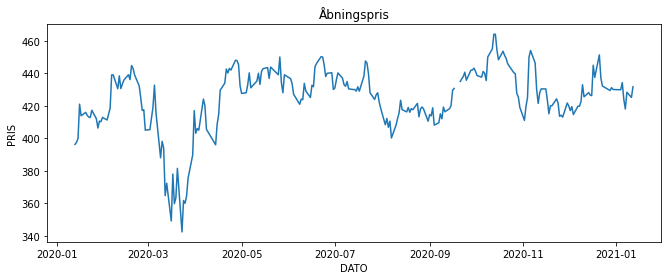

In [3]:
#Visualiser lukkepris
plt.figure(figsize=(11, 4))
plt.title("Åbningspris")
plt.plot(data["Open"])
plt.xlabel("DATO")
plt.ylabel("PRIS")
plt.show()

In [4]:
#Moving averages
#Kort/Eksponentialt gennemsnit
shortEMA = data.Open.ewm(span=12, adjust = False).mean()
#Medium/Eksponentialt gennemsnit
medEMA = data.Open.ewm(span=50, adjust = False).mean()
#Lang/Eksponentialt gennemsnit
longEMA = data.Open.ewm(span=200, adjust = False).mean()



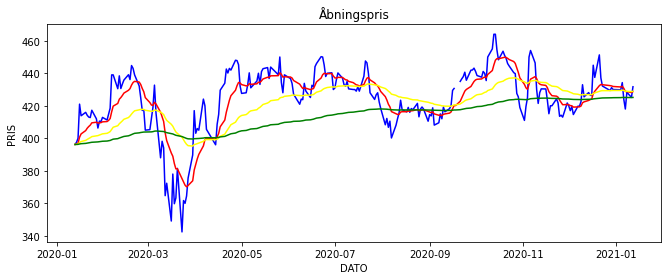

In [5]:
#Visualiser lukkepris og moving averages
plt.figure(figsize=(11, 4))
plt.title("Åbningspris")
plt.plot(data["Open"], label = "Åbningspris", color = "Blue")
plt.plot(shortEMA, label = "Short EMA", color = "Red")
plt.plot(medEMA, label = "Mid EMA", color = "Yellow")
plt.plot(longEMA, label = "Long EMA", color = "Green")
plt.xlabel("DATO")
plt.ylabel("PRIS")
plt.show()

In [6]:
#Implementer nye datakolonner
data["Kort"] = shortEMA
data["Mellem"] = medEMA
data["Lang"] = longEMA

In [7]:
#Vis de nye kolonner
data

,Date,Open,High,Low,Close,Adj Close,Volume,Kort,Mellem,Lang
2020-01-13,2020-01-13,396.200012,399.299988,394.500000,397.049988,388.500061,1597499.0,396.200012,396.200012,396.200012
2020-01-14,2020-01-14,397.500000,398.600006,393.850006,398.600006,390.016724,1962343.0,396.400010,396.250992,396.212947
2020-01-15,2020-01-15,400.000000,418.899994,399.250000,418.649994,409.634949,3788467.0,396.953855,396.398012,396.250629
2020-01-16,2020-01-16,421.000000,426.000000,408.100006,410.200012,401.366913,3455749.0,400.653262,397.362796,396.496892
2020-01-17,2020-01-17,413.850006,418.200012,412.700012,413.549988,404.644775,2788722.0,402.683530,398.009353,396.669560
...,...,...,...,...,...,...,...,...,...,...
2021-01-06,2021-01-06,423.950012,424.450012,417.549988,418.000000,418.000000,2860414.0,430.739390,429.380913,425.095996
2021-01-07,2021-01-07,418.000000,425.000000,417.799988,422.049988,422.049988,2816704.0,428.779484,428.934602,425.025389
2021-01-08,2021-01-08,428.299988,428.299988,423.350006,425.649994,425.649994,2121196.0,428.705715,428.909715,425.057972
2021-01-11,2021-01-11,425.149994,432.950012,422.649994,430.500000,430.500000,2385706.0,428.158681,428.762275,425.058888


In [8]:
#Køb/Salg funktion
def trade_func(data):
  buy_li = []
  sell_li = []
  short = False
  long = False

  for i in range(0, len(data)):
    if data["Mellem"][i] < data["Lang"][i] and data["Kort"][i] < data["Mellem"][i] and long == False and short == False:
      buy_li.append(data["Open"][i])
      sell_li.append(np.nan)
      short = True
    elif short == True and data["Kort"][i] > data["Mellem"][i]:
      sell_li.append(data["Open"][i])
      buy_li.append(np.nan)
      short = False
    elif data["Mellem"][i] > data["Lang"][i] and data["Kort"][i] > data["Mellem"][i] and long == False and short == False:
      buy_li.append(data["Open"][i])
      sell_li.append(np.nan)
      long = True
    elif long == True and data["Kort"][i] < data["Mellem"][i]:
      sell_li.append(data["Open"][i])
      buy_li.append(np.nan)
      long = False
    else:
      buy_li.append(np.nan)
      sell_li.append(np.nan)

  return (buy_li, sell_li)

In [9]:
data["Buy"] = trade_func(data)[0]
data["Sell"] = trade_func(data)[1]

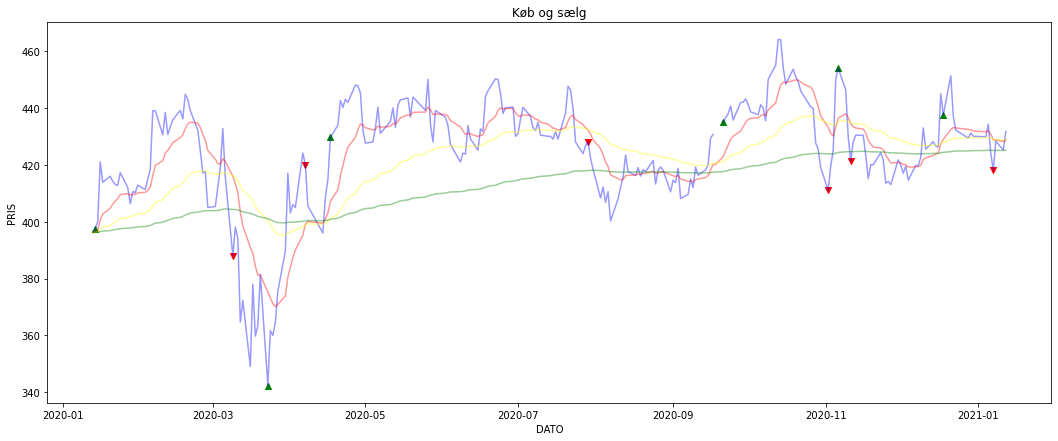

In [10]:
#Visualiser køb og salg signalerne
plt.figure(figsize=(18, 7))
plt.title("Køb og sælg")
plt.plot(data["Open"], label = "Lukkepris", color = "Blue", alpha = 0.4)
plt.plot(shortEMA, label = "Short EMA", color = "Red", alpha = 0.4)
plt.plot(medEMA, label = "Mid EMA", color = "Yellow", alpha = 0.4)
plt.plot(longEMA, label = "Long EMA", color = "Green", alpha = 0.4)
plt.scatter(data.index, data["Buy"], color = "Green", marker = "^")
plt.scatter(data.index, data["Sell"], color = "Red", marker = "v")
plt.xlabel("DATO")
plt.ylabel("PRIS")
plt.show()

In [11]:
df = data[["Buy", "Sell", "Open"]]
df = df.fillna(0)

def money_func(data):
  not_money = []
  money = []
  buy = True

  for i in range(0, len(data)):
    if df["Buy"][i] > df["Sell"][i]:
      money.append(df["Open"][i])
      buy = True
    elif df["Buy"][i] < df["Sell"][i]:
      not_money.append(df["Open"][i])
      buy = False
    elif buy == True:
      money.append(df["Open"][i])
    else:
      not_money.append(df["Open"][i])
      buy = False
    
  return sum(money) - (sum(df["Open"]) - sum(not_money))


In [12]:
money_func(df)

2.9103830456733704e-11